## 0.1 Salaries in Data Field

In [3]:
import pandas as pd
import numpy as np
import matplotlib as plt

df = pd.read_csv("../data/salaries.csv")
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025,EX,FT,Head of Data,348516,USD,348516,US,0,US,M
1,2025,EX,FT,Head of Data,232344,USD,232344,US,0,US,M
2,2025,SE,FT,Data Scientist,145400,USD,145400,US,0,US,M
3,2025,SE,FT,Data Scientist,81600,USD,81600,US,0,US,M
4,2025,MI,FT,Engineer,160000,USD,160000,US,100,US,M


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151445 entries, 0 to 151444
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   work_year           151445 non-null  int64 
 1   experience_level    151445 non-null  object
 2   employment_type     151445 non-null  object
 3   job_title           151445 non-null  object
 4   salary              151445 non-null  int64 
 5   salary_currency     151445 non-null  object
 6   salary_in_usd       151445 non-null  int64 
 7   employee_residence  151445 non-null  object
 8   remote_ratio        151445 non-null  int64 
 9   company_location    151445 non-null  object
 10  company_size        151445 non-null  object
dtypes: int64(4), object(7)
memory usage: 12.7+ MB


In [8]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

### b, Plot the Salary (USD) Distribution Across Job Titles

In [45]:
df.groupby("job_title")["salary_in_usd"].mean()

# analyzing variable salary_usd, group by job title and divide for median salary/group

job_title
AI Architect                    210091.283737
AI Content Writer                40506.666667
AI Data Engineer                 94444.000000
AI Data Scientist                87253.666667
AI Developer                    153505.454955
                                    ...      
Technical Support Specialist     75500.000000
Technical Writer                171947.027027
Technology Integrator            98650.000000
Trainee                          52927.500000
Web Developer                   121562.111111
Name: salary_in_usd, Length: 422, dtype: float64

In [26]:
import duckdb

df_salary_distribution = duckdb.query(
    """
    SELECT
        job_title,
        salary_in_usd,
        SUM(salary_in_usd) as Salary_in_USD,
    FROM df
    GROUP BY
        salary_in_usd,
        job_title
    ORDER BY
        salary_in_usd ASC
    """
).df()

df_salary_distribution

,job_title,salary_in_usd,Salary_in_USD_1
0,Staff Data Analyst,15000,15000.0
1,Machine Learning Developer,15000,15000.0
2,Business Intelligence Developer,15000,15000.0
3,Data Analyst,15000,15000.0
4,BI Analyst,15107,15107.0
...,...,...,...
43344,Software Engineer,180000,59220000.0
43345,Software Engineer,250000,60250000.0
43346,Data Scientist,110000,63910000.0
43347,Software Engineer,200000,71200000.0


### Using histogram to show salary spread

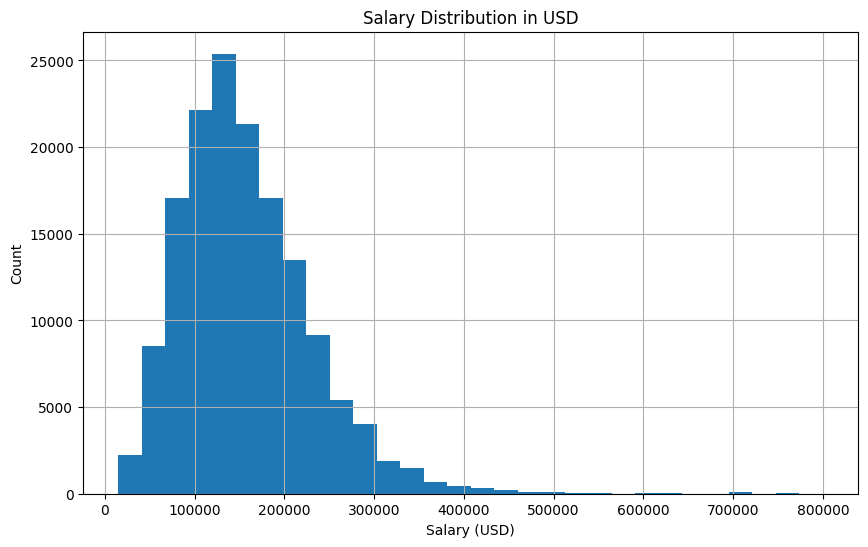

In [32]:
df["salary_in_usd"].hist(bins=30, figsize=(10,6))
plt.xlabel("Salary (USD)")
plt.ylabel("Count")
plt.title("Salary Distribution in USD")
plt.show()

<Axes: xlabel='experience_level', ylabel='salary_in_usd'>

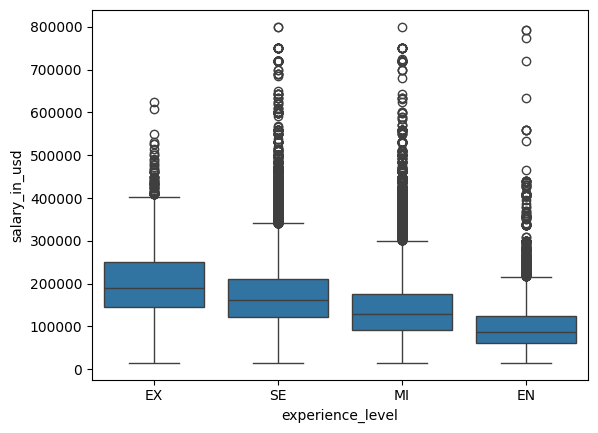

In [40]:
import seaborn as sns
sns.boxplot(x="experience_level", y="salary_in_usd", data=df)

#### c, How Many Job Postings for each Title? Take 10th most common Job title and plot bar chart of number of postings

In [63]:
df.groupby("job_title").size().sort_values(ascending=False).head(15)

job_title
Data Scientist               18751
Software Engineer            16948
Data Engineer                16352
Data Analyst                 13779
Engineer                     11004
Machine Learning Engineer     8887
Manager                       7811
Analyst                       5396
Research Scientist            3460
Product Manager               2576
Applied Scientist             2381
Associate                     2379
Data Architect                2216
Analytics Engineer            2139
AI Engineer                   2013
dtype: int64

In [64]:
df["job_title"].value_counts().head(10)

job_title
Data Scientist               18751
Software Engineer            16948
Data Engineer                16352
Data Analyst                 13779
Engineer                     11004
Machine Learning Engineer     8887
Manager                       7811
Analyst                       5396
Research Scientist            3460
Product Manager               2576
Name: count, dtype: int64

In [74]:
# Bar chart for 'Product Manager' - number of listings according to salary
pm_df = df[df["job_title"] == "Product Manager"]
pm_df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
28,2025,SE,FT,Product Manager,207000,USD,207000,US,100,US,M
29,2025,SE,FT,Product Manager,144200,USD,144200,US,100,US,M
48,2025,SE,FT,Product Manager,140000,USD,140000,US,0,US,M
49,2025,SE,FT,Product Manager,110000,USD,110000,US,0,US,M
392,2025,SE,FT,Product Manager,205000,USD,205000,US,0,US,M
...,...,...,...,...,...,...,...,...,...,...,...
121165,2024,MI,FT,Product Manager,140000,USD,140000,US,0,US,M
121258,2024,SE,FT,Product Manager,230400,USD,230400,US,0,US,M
121259,2024,SE,FT,Product Manager,192000,USD,192000,US,0,US,M
121266,2024,SE,FT,Product Manager,260586,USD,260586,US,0,US,M


In [75]:
pm_df["salary_in_usd"].value_counts().sort_index()

salary_in_usd
39500     3
40000     1
40800     1
42105     1
46736     1
         ..
465000    1
476000    1
500000    1
510720    2
725000    1
Name: count, Length: 784, dtype: int64

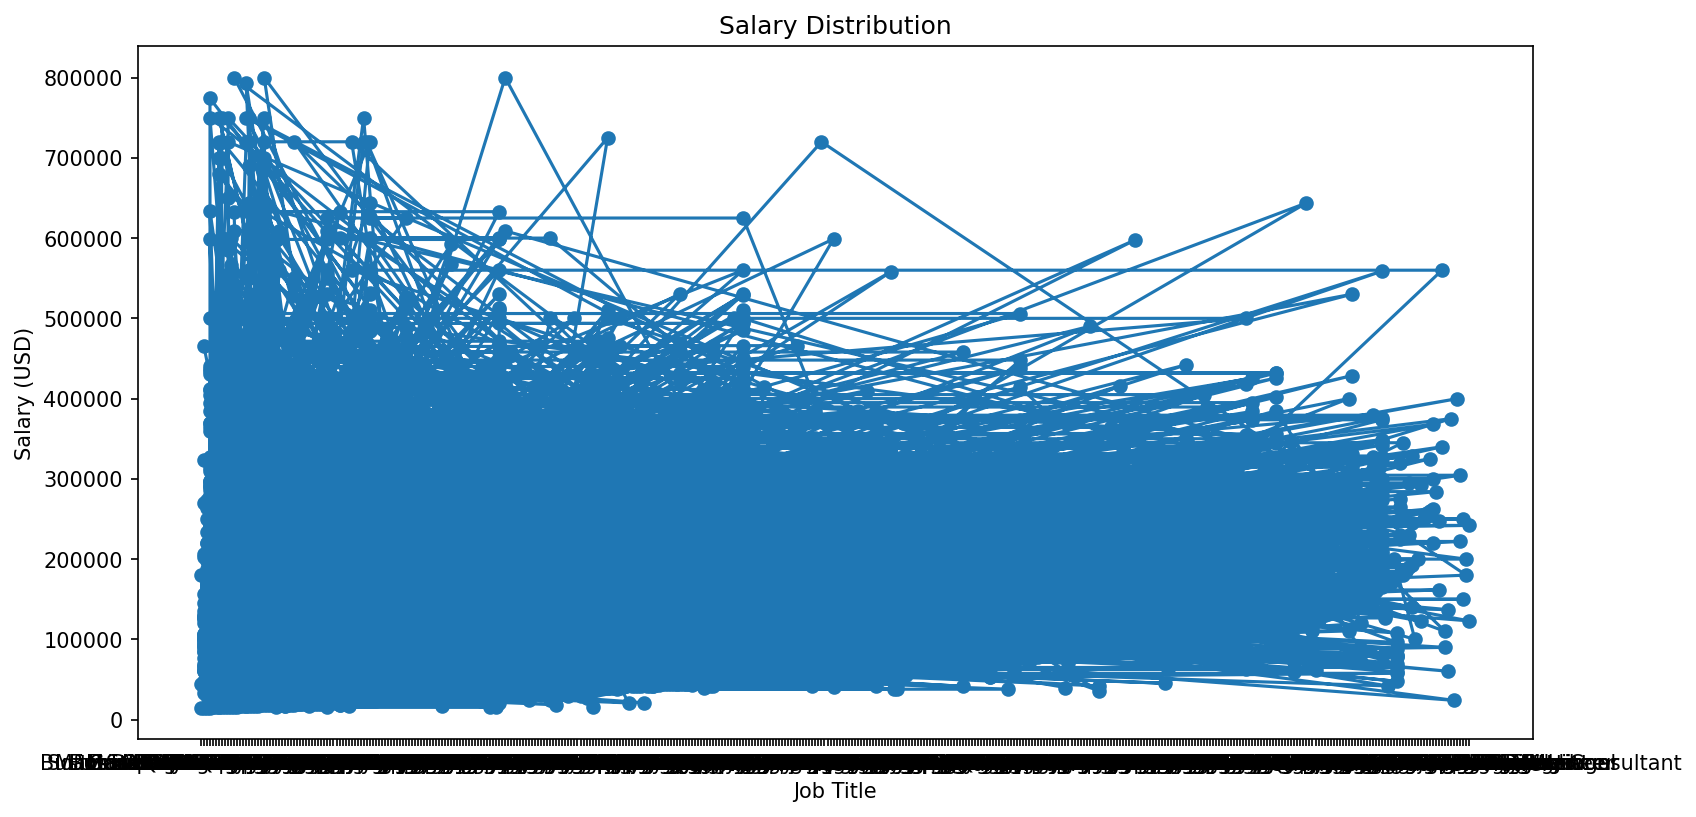

In [27]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, figsize= (12, 6), dpi=150)

ax.plot(df_salary_distribution["job_title"], df_salary_distribution["salary_in_usd"], marker='o')
#format yaxis with 'K' for x 1000
#ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f"{int(x/1000)} K"))
ax.set(xlabel = "Job Title", ylabel= "Salary (USD)", title = "Salary Distribution")

#plt.savefig("cars_sold_2009_to_2016.png", dpi=300, bbox_inches="tight")
plt.show()